In [12]:
import numpy as np
import scipy as sci
from scipy.optimize import curve_fit
from scipy.special import voigt_profile
import matplotlib.pyplot as plt 
import pandas as pd

**Actividad 1**

En esta actividad la idea principal es medir el espectro característico de rayos X del cobre (Cu). Para esto, se utilizó el montaje  que se ve en la figura. Tomamos datos como se indicó en la guía. Acá primero vamos a definir las funciones de ajuste que usaremos en el análisis.


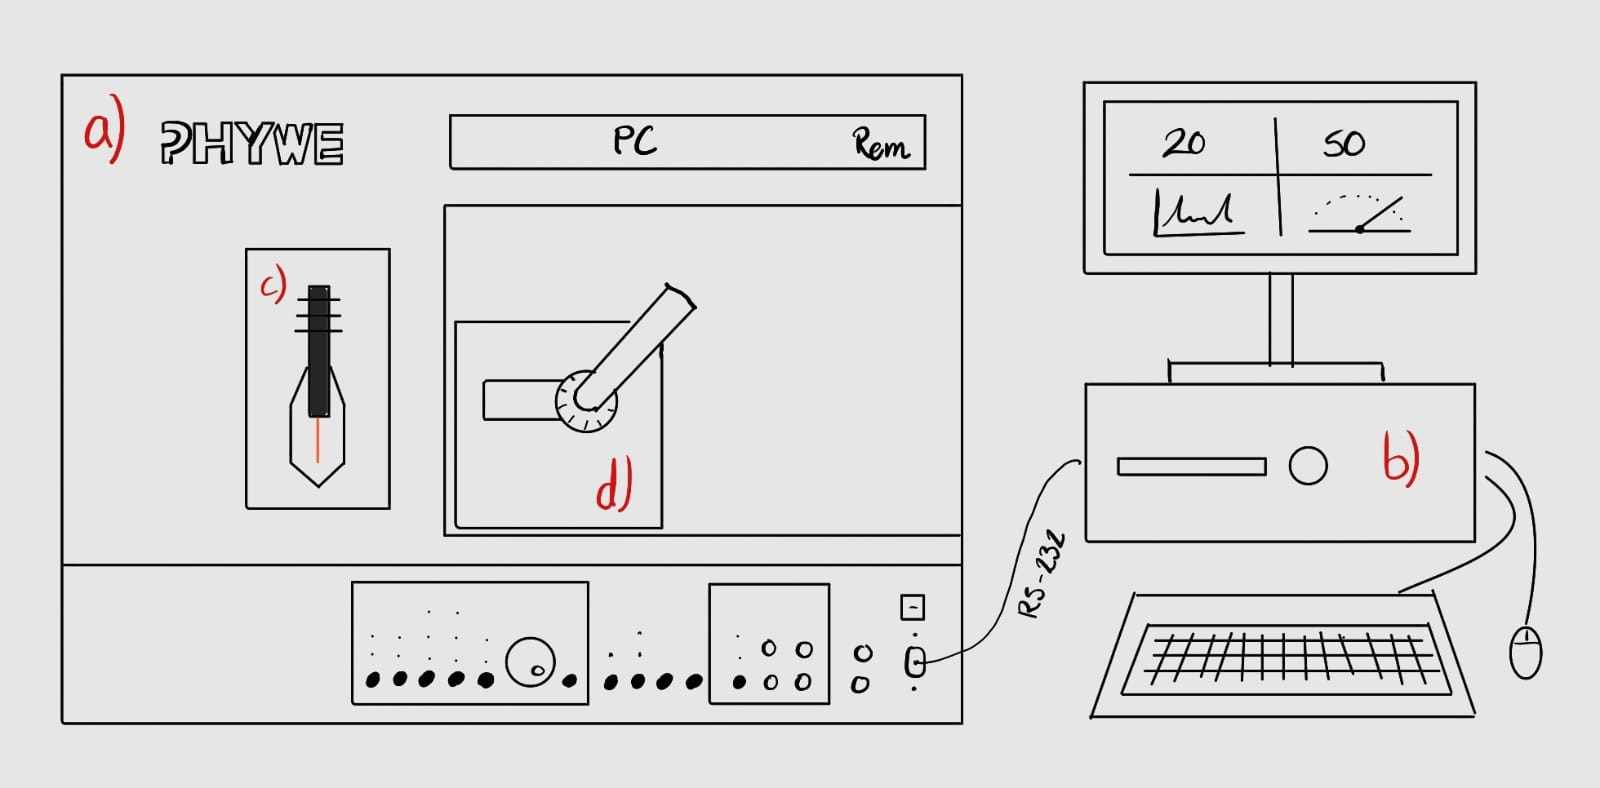

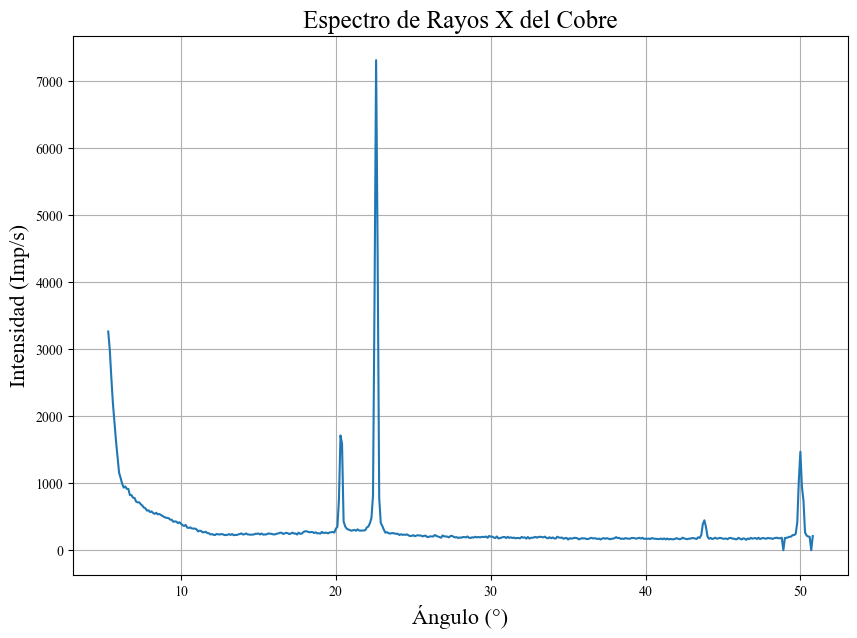

In [58]:
def lorentz(x, A, x0, gamma):
    return (A / np.pi) * (gamma / ((x - x0)**2 + gamma**2))


def linear(x, a, b):
    return a*x + b

def voigt(x, A, x0, sigma, gamma):
    return A * voigt_profile(x - x0, sigma, gamma)

def inc_bragg (d,id,theta,itheta,n):
    theta_=np.deg2rad(theta)
    itheta_=np.deg2rad(itheta)
    return 2/n* np.sqrt((np.sin(theta_)*id)**2+(d*np.cos(theta_)*itheta_)**2)


data = pd.read_excel("Rayos X.xlsx",sheet_name="Hoja1")
angulos=(data['Ángulo'].to_numpy())+2.3
intensidad=data['Intensidad'].to_numpy()

angulos

plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
plt.plot(angulos,intensidad)
plt.ylabel("Intensidad (Imp/s)", fontsize=16)
plt.title("Espectro de Rayos X del Cobre", fontsize=18)
plt.xlabel("Ángulo (°)",fontsize=16)
plt.grid(True)


Esta es una gráfica ilustrativa. En realidad, debemos usar la ley de Bragg
\begin{equation*}
n \lambda = 2d \text{sin}\theta \quad,\quad n\in \mathbb{N}
\end{equation*}
 para pasar de ángulo a longitud de onda. En el código sumamos 2.3 grados a cada uno por que el valor teórico era 22.6° y a nosotros nos dió 20.3°, por eso el offset. Usamos la ley de Bragg con $n=1$ y $n=2$.

In [ ]:
#Definimos antes las incertidumbres,como nuestro instrumento es analógico, su incertidumbre es su resolución.